In [1]:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sketch
from shapely.geometry import Point
import seaborn as sns
import time


# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

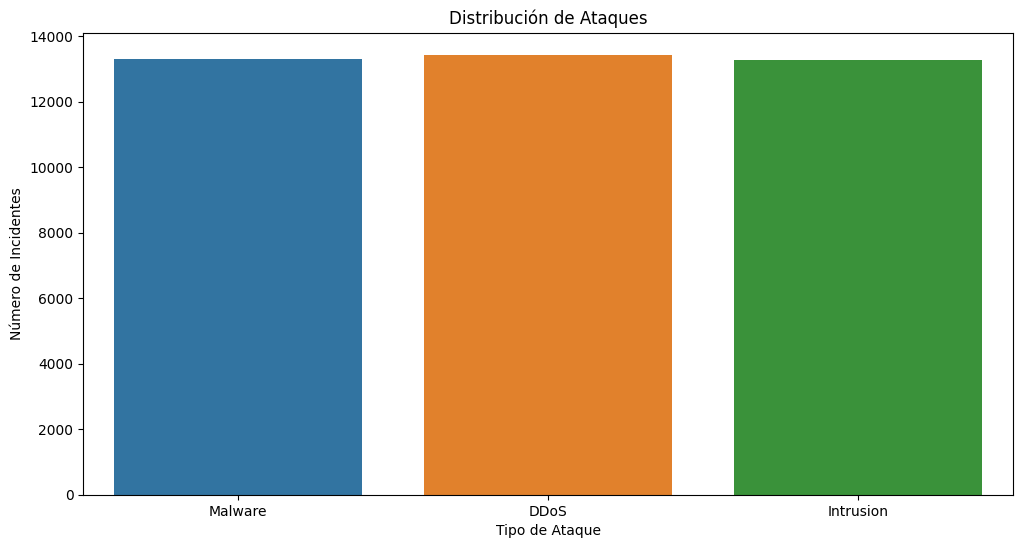

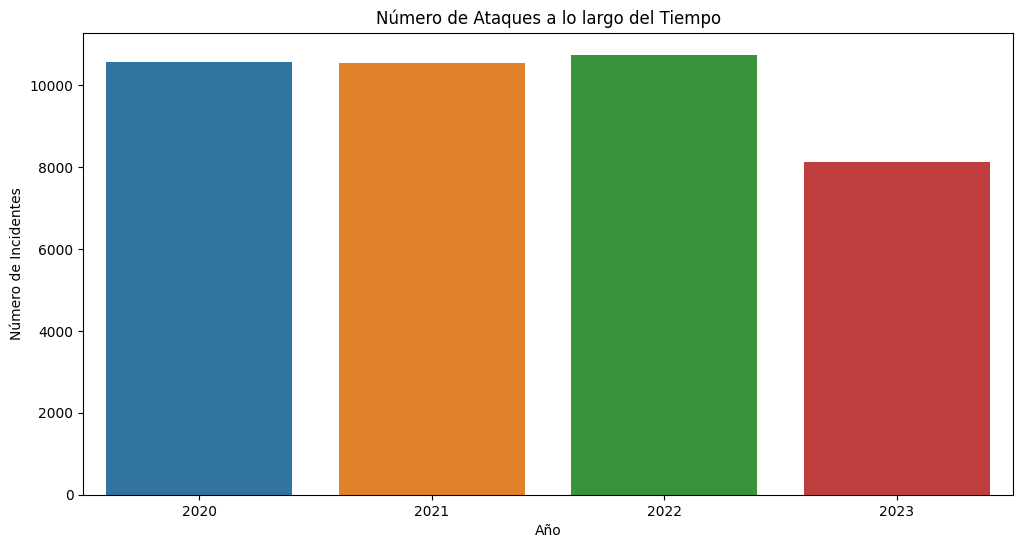

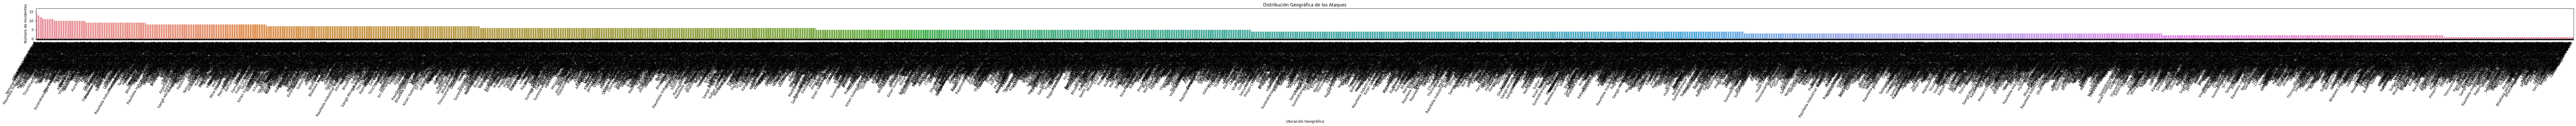

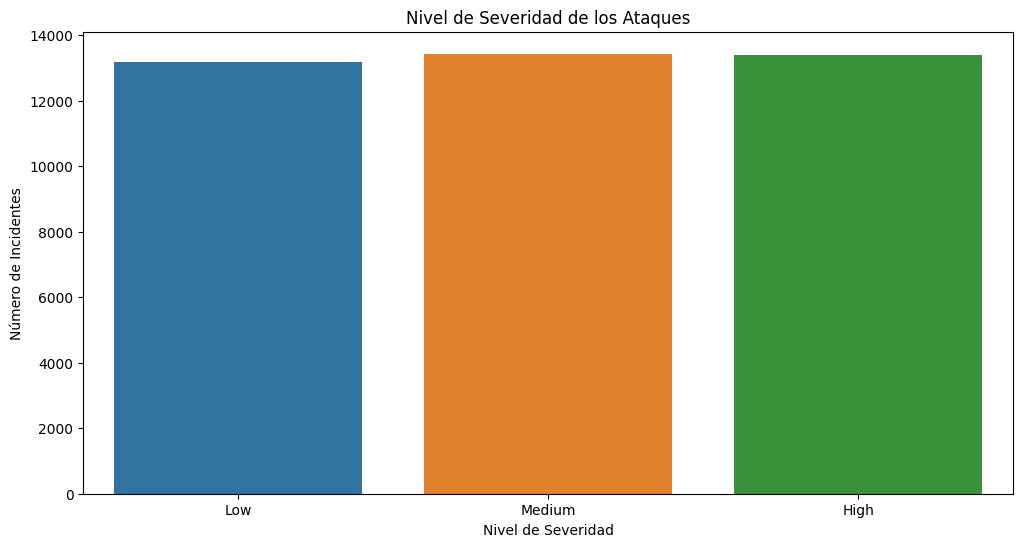

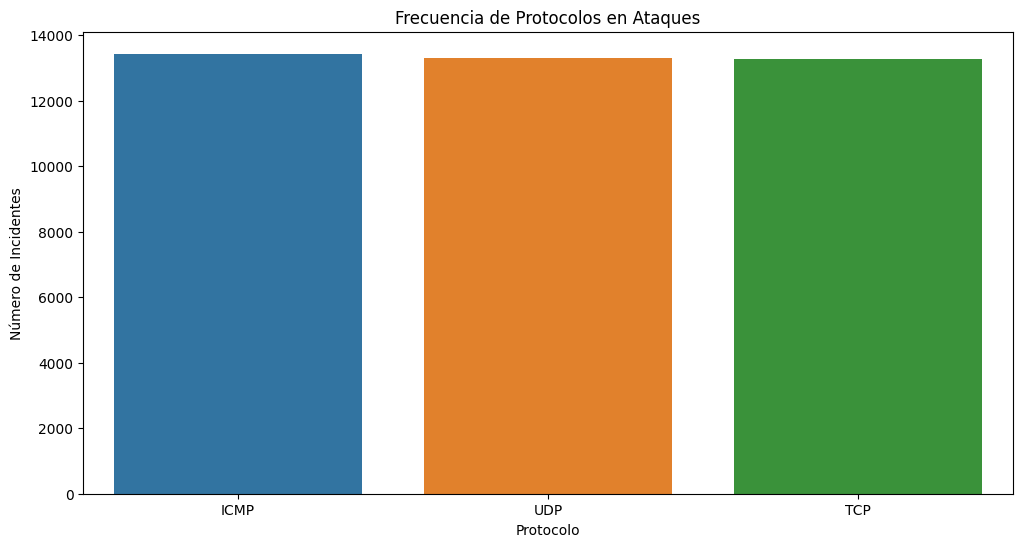

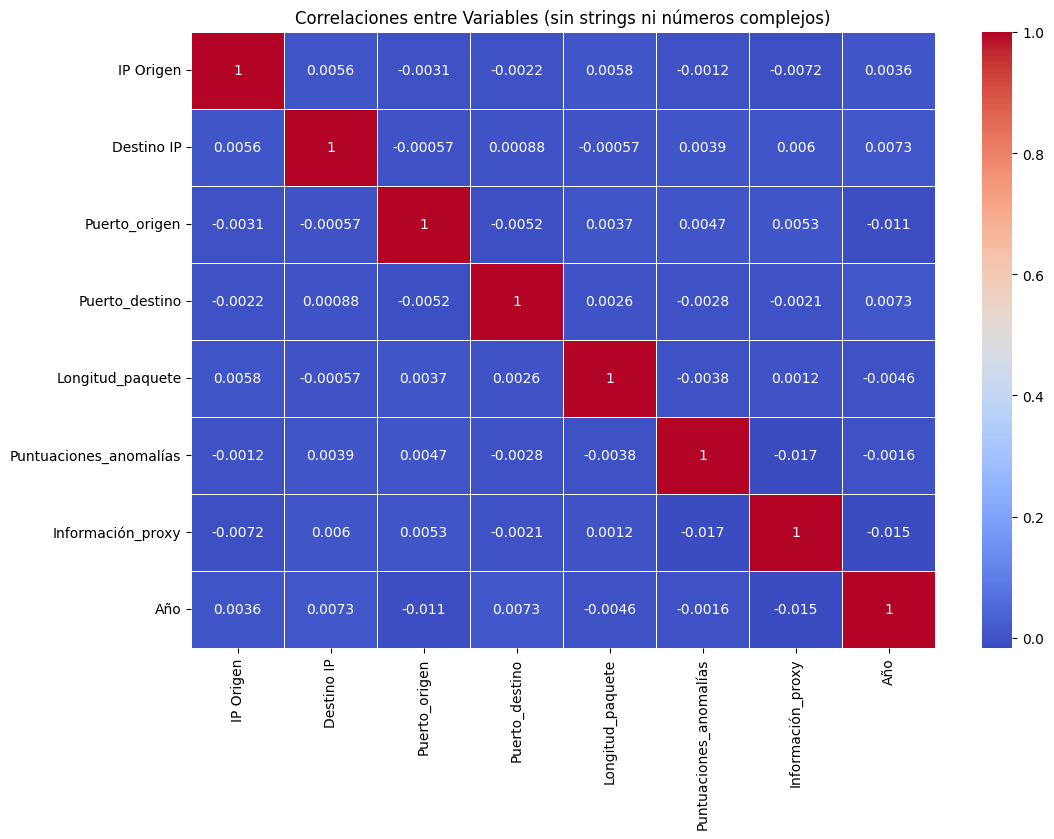

ValueError: could not convert string to float: 'ICMP'

<Figure size 1200x800 with 0 Axes>

In [5]:

# Convertir la columna 'Fecha_hora' a formato datetime
data['Fecha_hora'] = pd.to_datetime(data['Fecha_hora'])


# Distribución de Ataques
plt.figure(figsize=(12, 6))
sns.countplot(x='Tipo_ataque', data=data)
plt.title('Distribución de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Incidentes')
plt.show()

# Análisis Temporal
data['Año'] = data['Fecha_hora'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='Año', data=data)
plt.title('Número de Ataques a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.show()

# Origen de los Ataques
plt.figure(figsize=(50, 9))  # Ajusta el ancho de la figura
ax = sns.countplot(x='Datos_geolocalización', data=data, order=data['Datos_geolocalización'].value_counts().index)
ax.set_title('Distribución Geográfica de los Ataques')
ax.set_xlabel('Ubicación Geográfica')
ax.set_ylabel('Número de Incidentes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right', fontsize=10)  # Ajusta la rotación y el tamaño de las etiquetas

# Mostrar solo cada n-ésima etiqueta (ajusta el valor de n según tus necesidades)
n = 10
for label in ax.xaxis.get_ticklabels()[::n]:
    label.set_visible(True)
for label in ax.xaxis.get_ticklabels()[1::n]:
    label.set_visible(False)

plt.tight_layout()
plt.show()


# Consecuencias y Respuestas
plt.figure(figsize=(12, 6))
sns.countplot(x='Nivel_severidad', data=data)
plt.title('Nivel de Severidad de los Ataques')
plt.xlabel('Nivel de Severidad')
plt.ylabel('Número de Incidentes')
plt.show()

# Frecuencia de Protocolos
plt.figure(figsize=(12, 6))
sns.countplot(x='Protocolo', data=data)
plt.title('Frecuencia de Protocolos en Ataques')
plt.xlabel('Protocolo')
plt.ylabel('Número de Incidentes')
plt.show()

# Exploración de Características
# (Puedes agregar gráficos e histogramas para las características específicas)

#eliminar las columnas que contienen strings o números complejos antes de calcular la correlación
def filter_numeric_columns(df):
    # Filtrar solo las columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Eliminar columnas que contienen strings o números complejos
    filtered_cols = [col for col in numeric_cols if all(isinstance(val, (int, float)) and not isinstance(val, complex) for val in df[col])]
    
    return df[filtered_cols]


# Aplicar la función antes de calcular la correlación
filtered_data = filter_numeric_columns(data)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables (sin strings ni números complejos)')
plt.show()

# Correlaciones y Relaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables')
plt.show()

# Identificar columnas no numéricas
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_columns)

# Eliminar columnas complejas
data_no_complex = data.select_dtypes(exclude=['complex'])


# Convertir números complejos a cadenas
data_string = data.applymap(lambda x: str(x) if isinstance(x, complex) else x)



# Seleccionar solo las columnas numéricas excluyendo 'Datos_geolocalización'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Datos_geolocalización'], errors='ignore')

# Codificar columnas categóricas
data_encoded = pd.get_dummies(data)

# Correlaciones y Relaciones
plt.figure(figsize=(12, 8))
sns.heatmap(data_no_complex.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables(sin numeros complejos)')
plt.show()

# Descripción estadística
filtered_data.describe()



# Crear un histograma de la distribución de tipos de ataques
plt.figure(figsize=(10, 6))
data['Tipo_ataque'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Ataques')
plt.xlabel('Tipo de Ataque')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()






In [9]:
print(data.describe(include='all'))


                           Fecha_hora     IP Origen    Destino IP  \
count                           40000  4.000000e+04  4.000000e+04   
unique                            NaN           NaN           NaN   
top                               NaN           NaN           NaN   
freq                              NaN           NaN           NaN   
mean    2021-11-22 06:17:52.200800256  3.031392e+10  3.055188e+10   
min               2020-01-01 00:43:27  2.151700e+04  2.208900e+04   
25%        2020-12-12 19:56:28.500000  1.001700e+09  1.028973e+09   
50%               2021-11-21 18:12:51  6.466671e+09  6.729165e+09   
75%        2022-10-30 08:48:10.500000  1.996264e+10  2.011926e+10   
max               2023-10-11 19:34:23  2.232533e+11  2.232552e+11   
std                               NaN  5.466664e+10  5.473096e+10   

        Puerto_origen  Puerto_destino Protocolo  Longitud_paquete  \
count    40000.000000    40000.000000     40000      40000.000000   
unique            NaN            

In [ ]:
"""# Supongamos que tienes un archivo shapefile con las provincias del país
# Reemplaza 'ruta_del_shapefile' con la ubicación de tu archivo shapefile
shapefile_path = 'ruta_del_shapefile'
provincias = gpd.read_file(shapefile_path)

# Fusiona los datos geográficos con los datos de ataques
data_geografica = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitud, data.Latitud))
ataques_por_provincia = gpd.sjoin(data_geografica, provincias, op='within')

# Plotea el mapa
fig, ax = plt.subplots(figsize=(12, 8))
provincias.boundary.plot(ax=ax)
ataques_por_provincia.plot(ax=ax, color='red', markersize=10, alpha=0.7)
plt.title('Distribución Geográfica de los Ataques por Provincia')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()"""

In [5]:
data.describe()

Fecha_hora  Puerto_origen  Puerto_destino  \
count                          40000   40000.000000    40000.000000   
mean   2021-11-22 06:17:52.200800256   32970.356450    33150.868650   
min              2020-01-01 00:43:27    1027.000000     1024.000000   
25%       2020-12-12 19:56:28.500000   16850.750000    17094.750000   
50%              2021-11-21 18:12:51   32856.000000    33004.500000   
75%       2022-10-30 08:48:10.500000   48928.250000    49287.000000   
max              2023-10-11 19:34:23   65530.000000    65535.000000   
std                              NaN   18560.425604    18574.668842   

       Longitud_paquete       Cluster  Puntuaciones_anomalias  
count      40000.000000  40000.000000            40000.000000  
mean         781.452725      2.095425             4547.413075  
min           64.000000      0.000000                0.000000  
25%          420.000000      1.000000             1643.000000  
50%          782.000000      2.000000             4455.000000  
75%         1143.000000      3.000000             7224.000000  
max         1500.000000      4.000000             9999.000000  
std          416.044192      1.484427             3057.496197

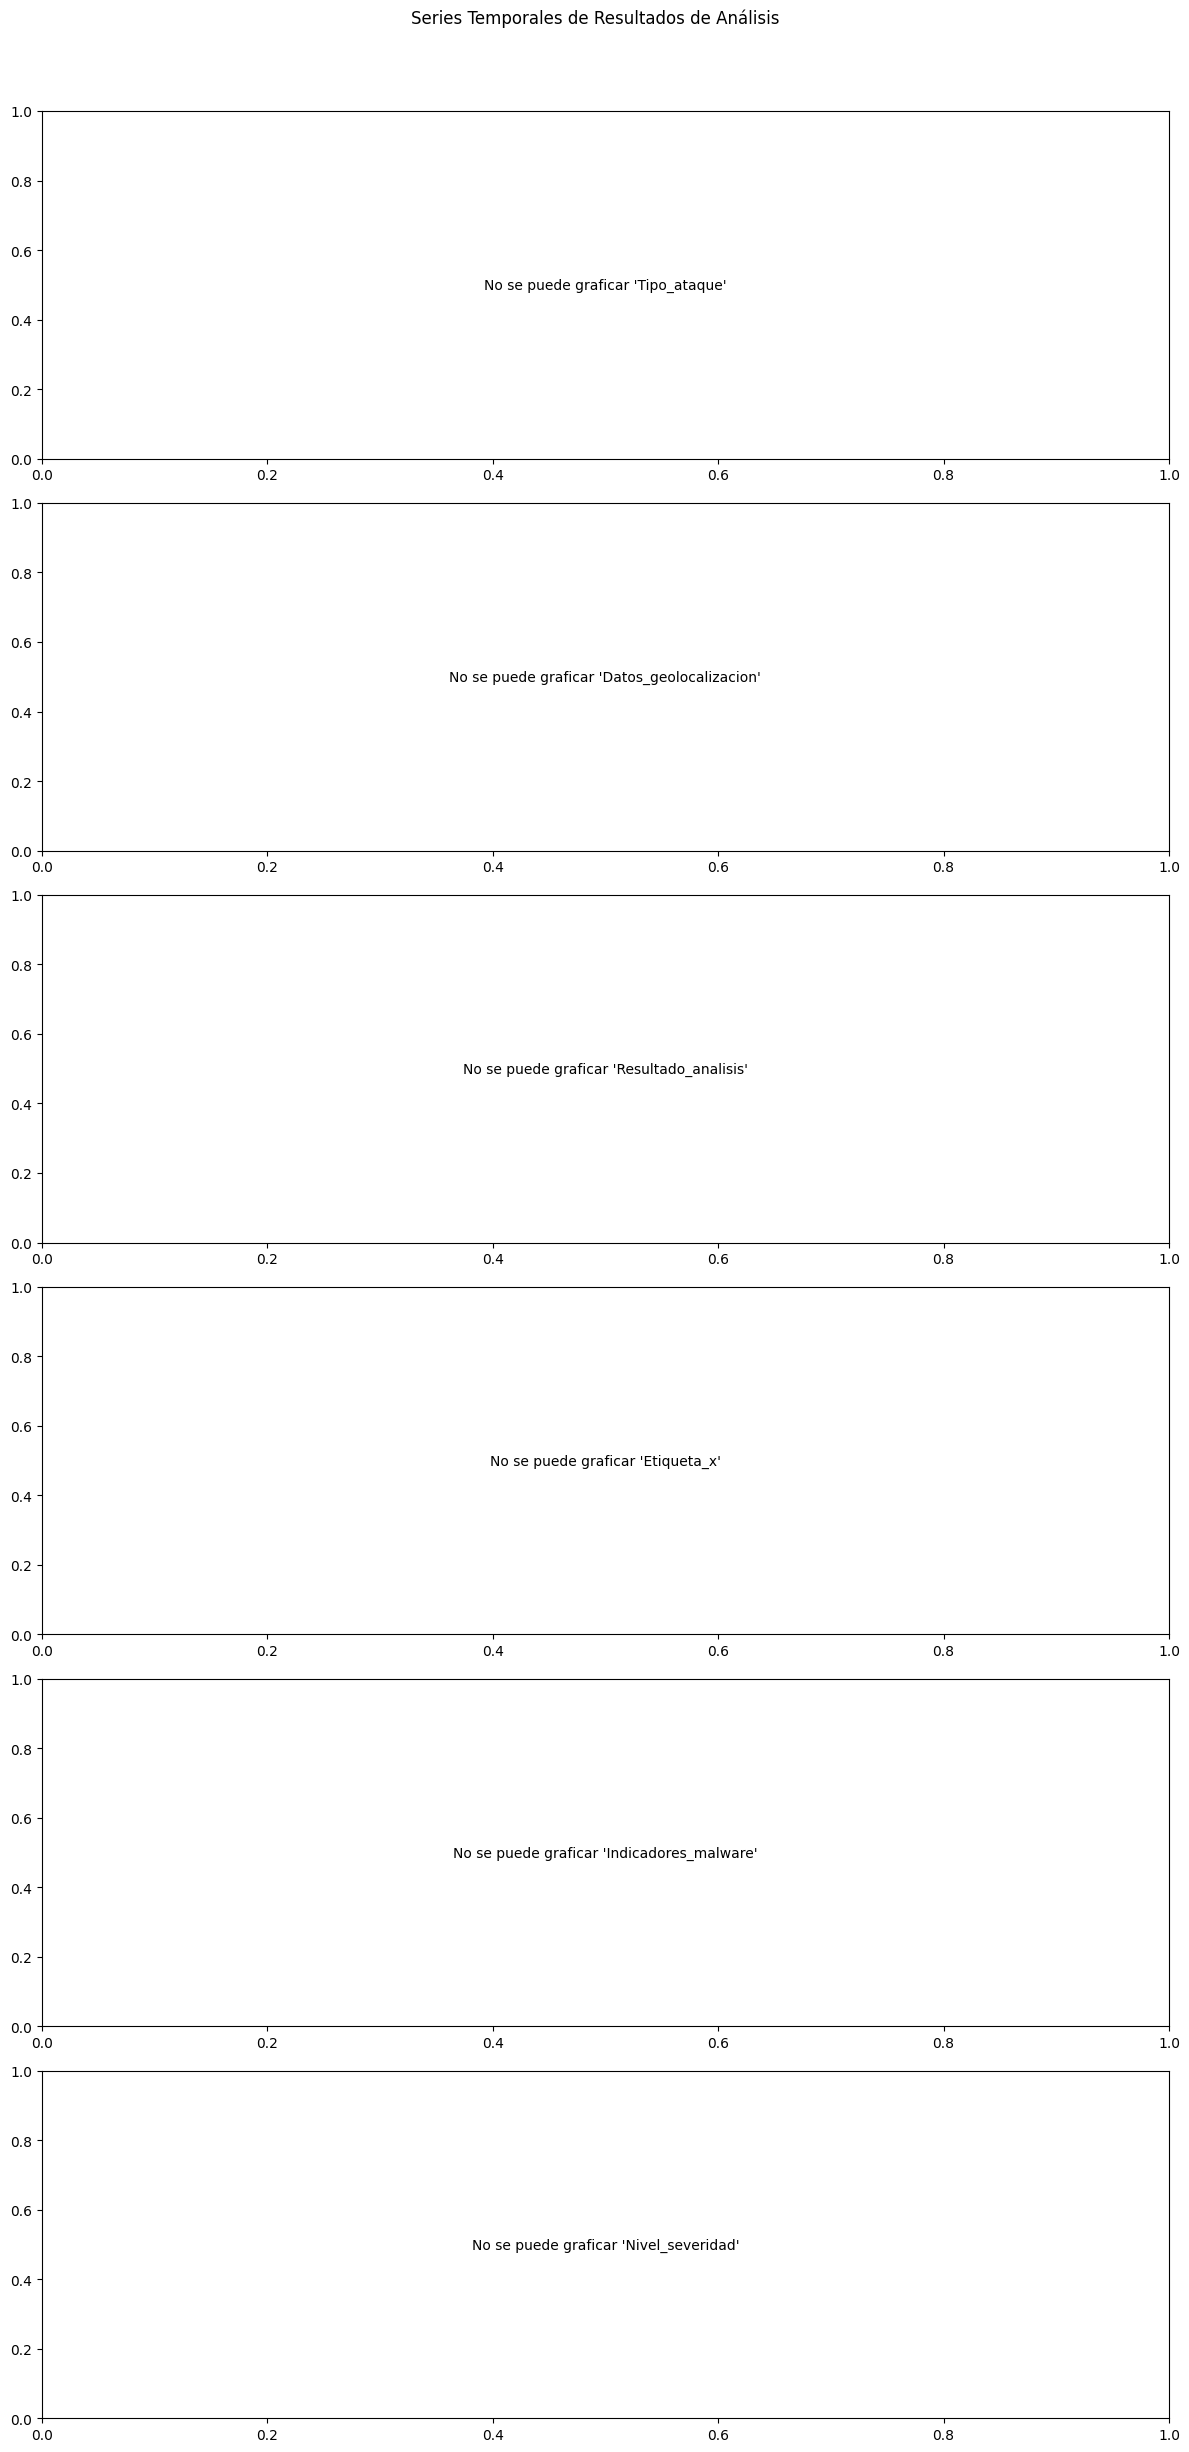

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos (asegúrate de ajustar el nombre del archivo)
data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

 #Convertir la columna 'Fecha_hora' al tipo de dato datetime
data['Fecha_hora'] = pd.to_datetime(data['Fecha_hora'])

# Seleccionar las columnas de interés para el análisis
columnas_interes = ['Fecha_hora', 'Puerto_origen', 'Puerto_destino', 'Longitud_paquete', 'Cluster', 'Puntuaciones_anomalias']

# Filtrar el DataFrame para incluir solo las columnas de interés
df_interes = data[columnas_interes]

# Manejar valores NaN
df_interes = df_interes.dropna()

# Convertir las columnas numéricas a tipo float
columnas_numericas = df_interes.select_dtypes(include=['float64']).columns
df_interes[columnas_numericas] = df_interes[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Agrupar por fecha y contar el número de ocurrencias de cada tipo de ataque
agrupado_por_fecha = df_interes.groupby(['Fecha_hora']).size().reset_index(name='Total_ocurrencias')

# Configurar subgráficos
fig, axs = plt.subplots(nrows=len(columnas_interes)-1, ncols=1, figsize=(12, 4 * (len(columnas_interes)-1)))
fig.suptitle('Series Temporales de Resultados de Análisis', y=1.02)

# Crear subgráficos para cada columna de interés
for i, columna in enumerate(columnas_interes[1:]):  # Excluyendo 'Fecha_hora'
    if columna in columnas_numericas:
        axs[i].plot(df_interes['Fecha_hora'], df_interes[columna], marker='o')
        axs[i].set_title(columna)
        axs[i].set_xlabel('Fecha y Hora')
        axs[i].set_ylabel(columna)
    else:
        axs[i].text(0.5, 0.5, f"No se puede graficar '{columna}'", ha='center', va='center', transform=axs[i].transAxes)

plt.tight_layout()
plt.show()

# Guardar los resultados en un archivo HTML
agrupado_por_fecha.to_html(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\resultados.html', index=False""aki-key varias.txt")



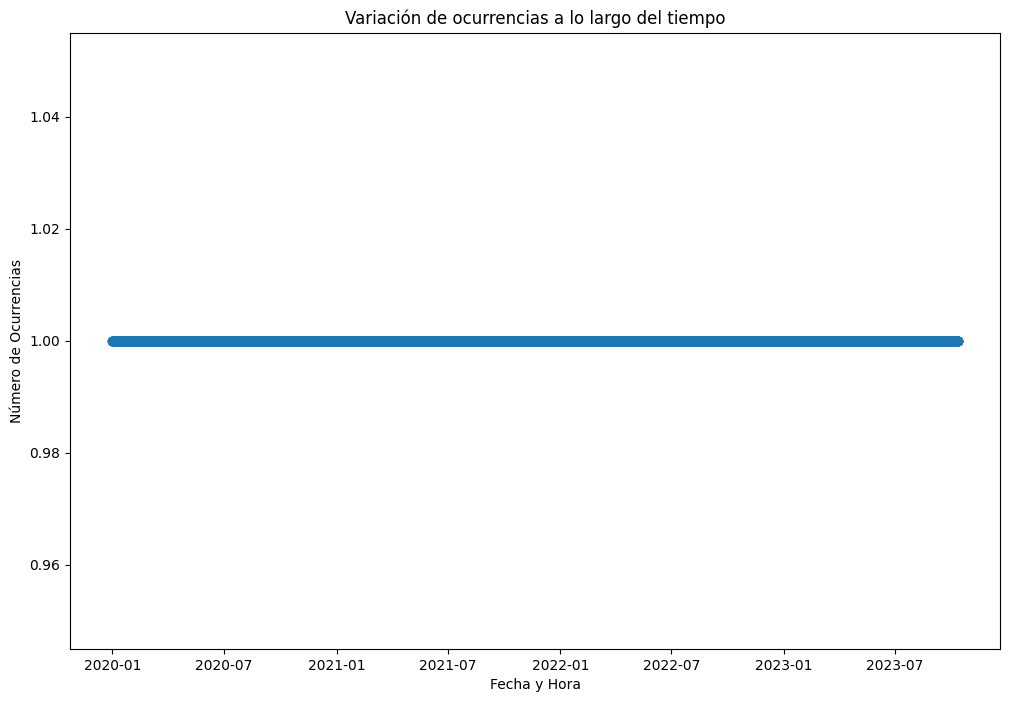

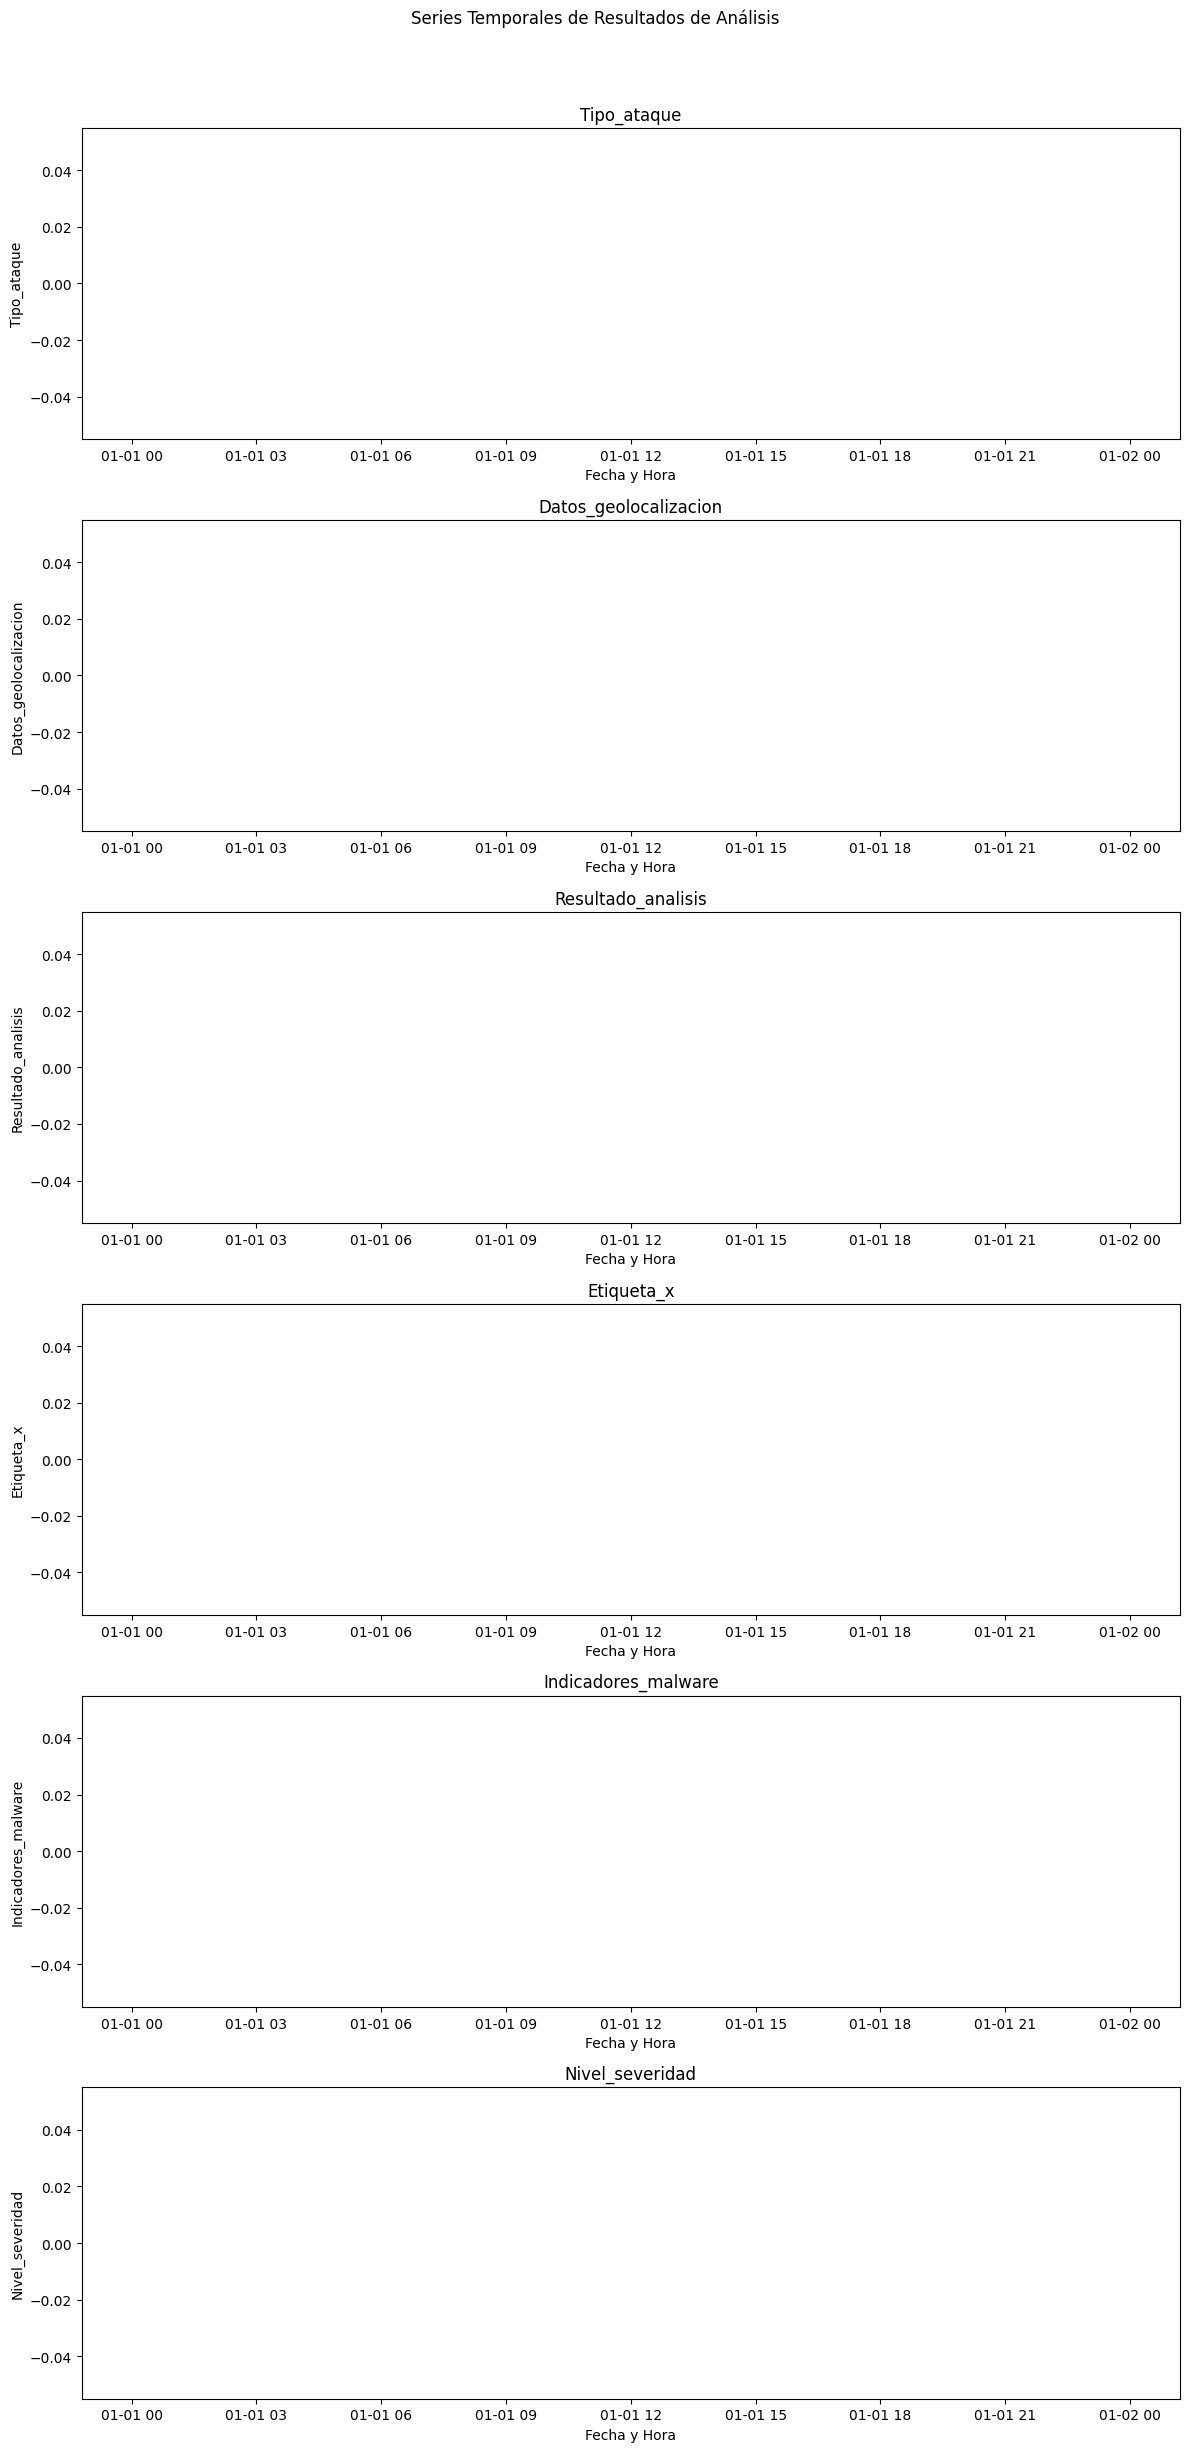

               Fecha_hora  Total_ocurrencias
0     2020-01-01 00:43:27                  1
1     2020-01-01 01:14:07                  1
2     2020-01-01 03:11:48                  1
3     2020-01-01 04:19:53                  1
4     2020-01-01 05:17:19                  1
5     2020-01-01 05:21:39                  1
6     2020-01-01 06:37:14                  1
7     2020-01-01 06:37:49                  1
8     2020-01-01 07:59:41                  1
9     2020-01-01 08:05:12                  1
10    2020-01-01 08:37:40                  1
11    2020-01-01 10:54:16                  1
12    2020-01-01 14:32:55                  1
13    2020-01-01 19:14:34                  1
14    2020-01-01 20:01:32                  1
15    2020-01-01 22:46:44                  1
16    2020-01-01 23:08:08                  1
17    2020-01-02 04:54:15                  1
18    2020-01-02 09:10:24                  1
19    2020-01-02 09:46:14                  1
20    2020-01-02 10:23:04                  1
21    2020

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde un archivo CSV (reemplaza 'nombre_del_archivo.csv' con tu archivo)
data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

# Convertir la columna 'Fecha_hora' al tipo de dato datetime
data['Fecha_hora'] = pd.to_datetime(data['Fecha_hora'])

# Seleccionar las columnas de interés para el análisis
columnas_interes = ['Fecha_hora', 'Tipo_ataque', 'Datos_geolocalizacion', 'Resultado_analisis', 'Etiqueta_x', 'Indicadores_malware', 'Nivel_severidad']

# Filtrar el DataFrame para incluir solo las columnas de interés
df_interes = data[columnas_interes]

# Manejar valores NaN
df_interes = df_interes.dropna()

# Convertir las columnas numéricas a tipo float
df_interes[columnas_interes[1:]] = df_interes[columnas_interes[1:]].apply(pd.to_numeric, errors='coerce')

# Agrupar por fecha y contar el número de ocurrencias de cada tipo de ataque
agrupado_por_fecha = df_interes.groupby(['Fecha_hora']).size().reset_index(name='Total_ocurrencias')

# Graficar la variación de ocurrencias a lo largo del tiempo
plt.figure(figsize=(12, 8))
plt.plot(agrupado_por_fecha['Fecha_hora'], agrupado_por_fecha['Total_ocurrencias'], marker='o')
plt.title('Variación de ocurrencias a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Ocurrencias')
plt.savefig(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\grafico_ocurrencias.png")  # Guardar el gráfico como una imagen PNG

# Guardar el DataFrame agrupado por fecha en un archivo HTML
agrupado_por_fecha.to_html(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\resultado_analisis.html", index=False)

# Configurar subgráficos
fig, axs = plt.subplots(nrows=len(columnas_interes)-1, ncols=1, figsize=(12, 4 * (len(columnas_interes)-1)))
fig.suptitle('Series Temporales de Resultados de Análisis', y=1.02)

# Crear subgráficos para cada columna de interés
for i, columna in enumerate(columnas_interes[1:]):  # Excluyendo 'Fecha_hora'
    axs[i].plot(df_interes['Fecha_hora'], df_interes[columna], marker='o')
    axs[i].set_title(columna)
    axs[i].set_xlabel('Fecha y Hora')
    axs[i].set_ylabel(columna)

plt.tight_layout()
plt.show()

# Guardar el DataFrame agrupado por fecha en un archivo HTML
agrupado_por_fecha.to_html(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\resultado_analisis.html", index=False)

# También puedes imprimir el DataFrame agrupado por fecha
print(agrupado_por_fecha)


